## 2021 Winter ECE 143

Airbnb Datasets are created by Airbnb, an online marketplace company that connects people who want to rent out their homes with people who are looking for accommodation in that locale. Airbnb Datasets contain a lot of different csv files during different time periods. They record the price, room type, occupancy rate, host rating, location of room, etc. By analyzing Airbnb Datasets, we can find some relationship between those factors. 




In [2]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import plotly.offline as pyo
import folium
from folium.plugins import HeatMap
# import plotly.graph_objs as go
# import plotly.express as px

## The trend of price

In [3]:
def string_to_date(file_name):
    '''
    Turns strings to date

    param: file with dates
    input param: file
    return: data time object
    '''
    month_str_to_int = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 
                        'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 
                        'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
    month = month_str_to_int[file_name[15+9:15+12]]
    day = int(file_name[15+13:15+15])
    year = int(file_name[15+16:15+20])
    return datetime.date(year, month, day)

def find_index(array, dt):
    '''
    Find index from array and datetime object
    param array: array of dates
    input array: array
    param dt: datetime object 
    input dt: datetime object
    return: index
    '''

    for i in range(len(array)):
        if dt.__eq__(array[i]):
            return i

In [4]:
listing_data_path = './listing_data'
listing_data_name = []
num_data = 0 # total number of files
date = [] # the datetime variable which restore the date
listing_data = [] # the list contains the pandas variable
date_array = None # The date_array, numpy array, restores the differnece of two dates
room = {'Shared room':0, 'Hotel room':1, 'Entire home/apt':2, 'Private room':3} # room type dict


# Loading all the listing data name
for file in os.listdir(listing_data_path):
    name = listing_data_path + '/' + file
    if len(name) == 39:
        listing_data_name.append(listing_data_path + '/' +  file)


for file_name in listing_data_name:
    data = pd.read_csv(file_name)
    listing_data.append(data)

# Create the time line array for date
for file_name in listing_data_name:
    dt = string_to_date(file_name)
    date.append(dt)
num_data = len(date)
# Bubble Sort
for i in range(num_data):
    for j in reversed(range(i, num_data)):
        if date[i].__ge__(date[j]):
            date[i], date[j] = date[j], date[i]
date_array = np.zeros((len(date)))

# Calculate the difference days between two dates:
for i in range(num_data):
    if i == 0:
        continue
    date_array[i] = (date[i].__sub__(date[i-1])).days + date_array[i-1]
price_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

    
# Loop for all data
for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        price_array[index][room[data['room_type'][i]]] += data['price'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        price_array[index][4] += data['price'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        price_array[index][i] /= cnt_array[index][i]
# Additional text for x-axis
x_pos = 950
y_pos = -55

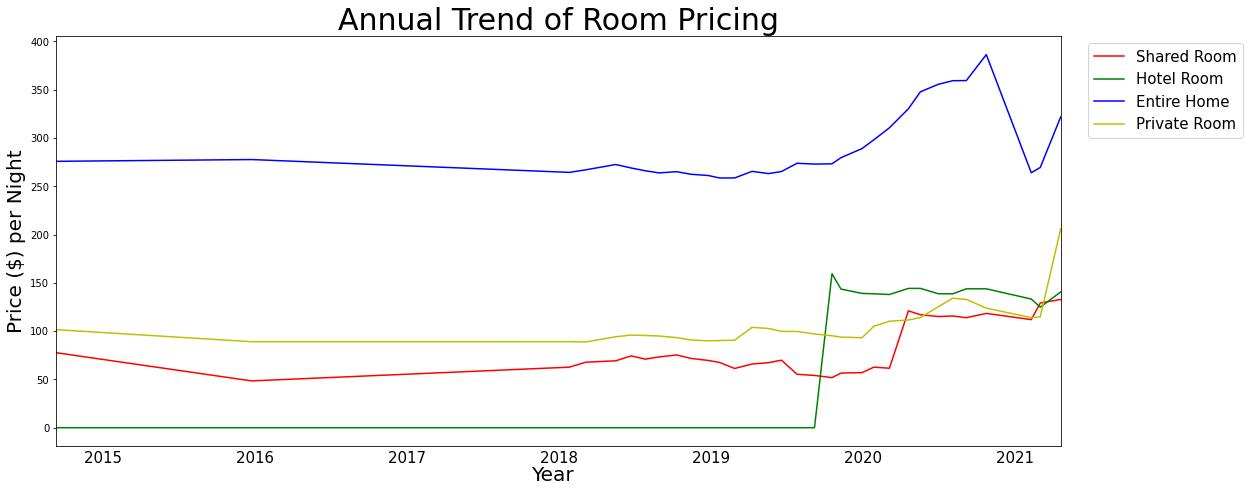

In [5]:
# Plot the line plot for price changing:
fig, ax = plt.subplots(1, figsize=(18, 15))# 18,10
plt.title('Annual Trend of Room Pricing', fontsize=30)
plt.xlabel('2015                        2016                        2017                        2018                        2019                        2020                        2021', fontsize=15)  
plt.ylabel('Price ($) per Night', fontsize = 20)  
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.text(x_pos, y_pos, "Year",fontsize = 20)
ax.plot(date_array, price_array[:,0], c='red', marker='',label='Shared Room')
ax.plot(date_array, price_array[:,1], c='g', marker='',label='Hotel Room')
ax.plot(date_array, price_array[:,2], c='b', marker='',label='Entire Home')
ax.plot(date_array, price_array[:,3], c='y', marker='',label='Private Room')
ax.spines['left'].set_visible(True)
plt.xlim(date_array[0], date_array[-1])
plt.subplots_adjust(bottom=0.5)
plt.axis('on')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.02, 1), prop={'size': 15})
plt.show()

## Trend of the Average availability\_365

In [6]:
# Loop for all data
avail_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        avail_array[index][room[data['room_type'][i]]] += data['availability_365'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        avail_array[index][4] += data['availability_365'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        avail_array[index][i] /= cnt_array[index][i]

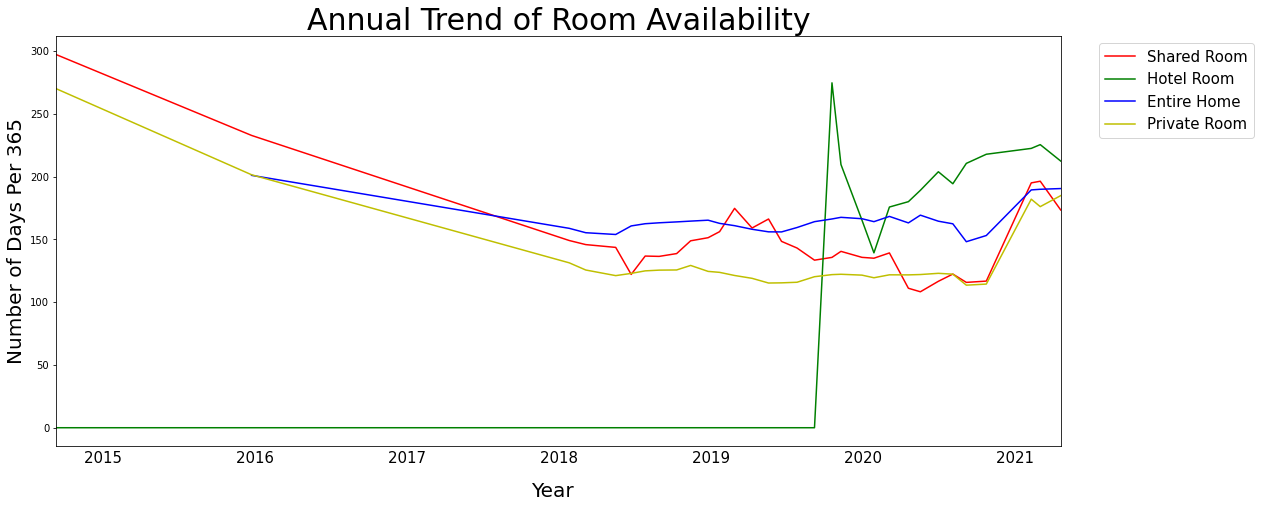

In [7]:
# Plot the line plot for price changing:
plt.figure(figsize=(18,15))
plt.title('Annual Trend of Room Availability', fontsize=30)
plt.xlabel('2015                        2016                        2017                        2018                        2019                        2020                        2021', fontsize = 15)  

plt.ylabel('Number of Days Per 365', fontsize = 20)  
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.rc('ytick', labelsize=15)
plt.text(x_pos, y_pos, "Year",fontsize = 20)
plt.plot(date_array, avail_array[:,0], c='red', marker='',label='Shared Room')
plt.plot(date_array, avail_array[:,1], c='g', marker='',label='Hotel Room')
plt.plot(date_array, avail_array[:,2], c='b', marker='',label='Entire Home')
plt.plot(date_array, avail_array[:,3], c='y', marker='',label='Private Room')
plt.xlim(date_array[0], date_array[-1])
plt.subplots_adjust(bottom=0.5)
plt.legend(bbox_to_anchor=(1.2, 1), prop={'size': 15})
plt.show()



From the previous plot, we can make the conclusion that:
1. The overall average availibility days among all room types are decreasing from 2015 to 2020 Jul, but slightly increasing from 2020 Jul til 2020 Dec
2. The Hotel room showed up at the beginning of 2019, and has the highest average availibility days
3. After 2020 Jul, all types rooms' availibility days were increasing.


In [8]:
# Loop for all data
minimum_night_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        minimum_night_array[index][room[data['room_type'][i]]] += data['minimum_nights'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        minimum_night_array[index][4] += data['minimum_nights'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        minimum_night_array[index][i] /= cnt_array[index][i]

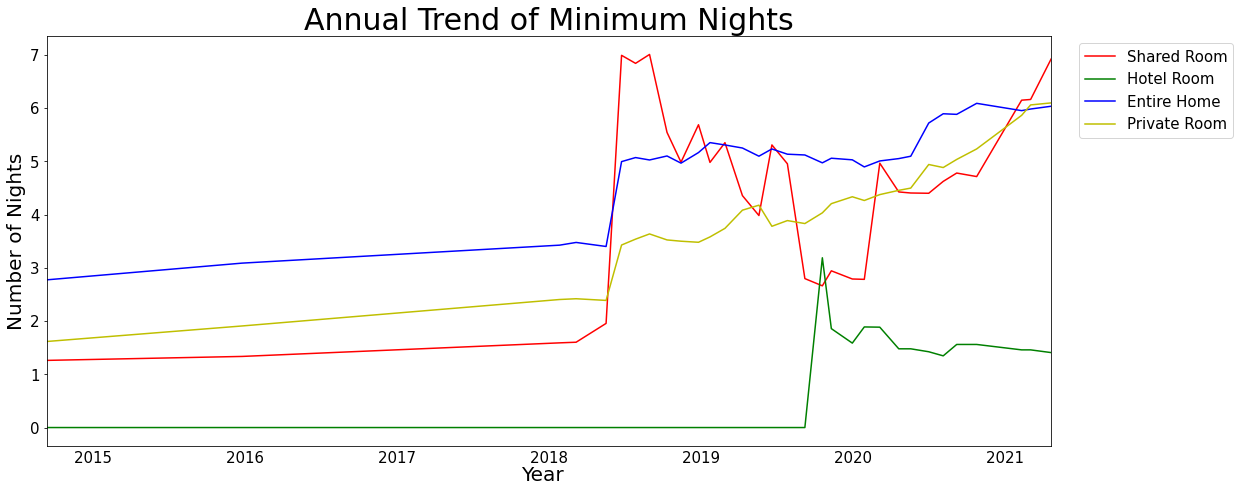

In [9]:
# Plot the line plot for price changing:
plt.figure(figsize=(18,15))
plt.title('Annual Trend of Minimum Nights', fontsize=30)
plt.xlabel('2015                        2016                        2017                        2018                        2019                        2020                        2021', fontsize = 15)  
plt.ylabel('Number of Nights', fontsize = 20)  
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.text(x_pos, -1, "Year",fontsize = 20)
plt.plot(date_array, minimum_night_array[:,0], c='red', marker='',label='Shared Room')
plt.plot(date_array, minimum_night_array[:,1], c='g', marker='',label='Hotel Room')
plt.plot(date_array, minimum_night_array[:,2], c='b', marker='',label='Entire Home')
plt.plot(date_array, minimum_night_array[:,3], c='y', marker='',label='Private Room')
plt.xlim(date_array[0], date_array[-1])
plt.grid(False)
plt.subplots_adjust(bottom=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), prop={'size': 15})
plt.axis(True)
plt.show()



In [10]:
#Use either 2015 or 2020 data for heat map.

map_data_path = './listing_data/listings_Dec_23_2020.csv'
# map_data_path = './listing_data/listings_Jun_22_2015.csv'
map_data = pd.read_csv(map_data_path)
print(map_data['latitude'].min(), map_data['latitude'].max(), map_data['longitude'].min(), map_data['longitude'].max())

32.54107 33.08582 -117.28143 -116.93571


## The heatmap plot for locations

In [11]:
# define the world map
world_map = folium.Map()

# San Diego Latitude and Longitude
latitude = 32.72
longitude = -117.16

limit = 10000
data = map_data.iloc[0:limit, :]

san_map = folium.Map(location=[latitude, longitude], zoom_start=10)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(san_map)
san_map

In [12]:
token = 'pk.eyJ1IjoiNzM2ODkxNDEwIiwiYSI6ImNrbDY4MnlvZzBibGMyd283OGprYWFuM3UifQ.MqFaTEXVYsnkkwFhxwEkmQ'
fig = go.Figure(go.Scattermapbox(mode='markers',
                                lon = data.longitude,
                                lat = data.latitude,
                                hovertext = data.id))
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

In [13]:
price_data = data[data.price < 300]
fig = px.scatter_mapbox(price_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'price',
                        title = 'price map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

In [14]:
price_data = data[data.price > 300]
price_data = price_data[price_data.price < 1000]
fig = px.scatter_mapbox(price_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'price',
                        title = 'price map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

In [15]:
price_data = data[data.price > 1000]
fig = px.scatter_mapbox(price_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'price',
                        title = 'price map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

## Part 5: The map plot for avaiability days

In [16]:
available_data = data
fig = px.scatter_mapbox(available_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'availability_365',
                        title = 'availability_365 map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

## Part 6: The map plot for minimum nights

In [17]:
minimum_nights_data = data[data.minimum_nights < 5]
fig = px.scatter_mapbox(minimum_nights_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'minimum_nights',
                        title = 'availability_365 map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

In [18]:
minimum_nights_data = data[data.minimum_nights > 5]
minimum_nights_data = minimum_nights_data[minimum_nights_data.minimum_nights < 35]
fig = px.scatter_mapbox(minimum_nights_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'minimum_nights',
                        title = 'availability_365 map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

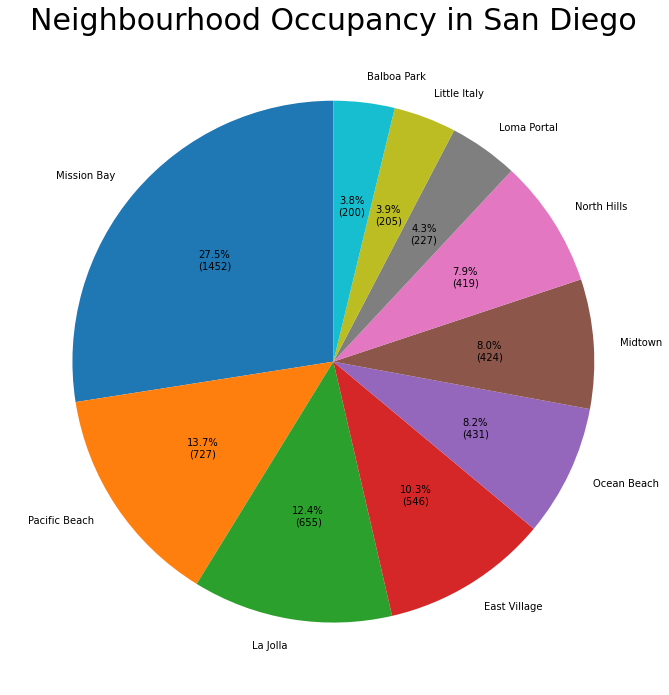

In [19]:
labels = data.neighbourhood.value_counts().index[0:10]
shape = data.neighbourhood.value_counts().values[0:10]
def func(pct, allvals):
    '''
    Function to label percentage and number of listings for the given neighbourhood
    input pct: percentage
    input allvals: neighborhood names
    return: pr
    '''
    absolute = int(pct/100.*np.sum(allvals))
    return "{:1.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize=(12,12))

# Visualize the pie chart
plt.pie(shape, explode = None, labels=labels, colors= None, autopct = lambda pct: func(pct, shape), startangle=90)
plt.title('Neighbourhood Occupancy in San Diego', fontsize= 30)
plt.rcParams['font.size'] = 15
plt.show()

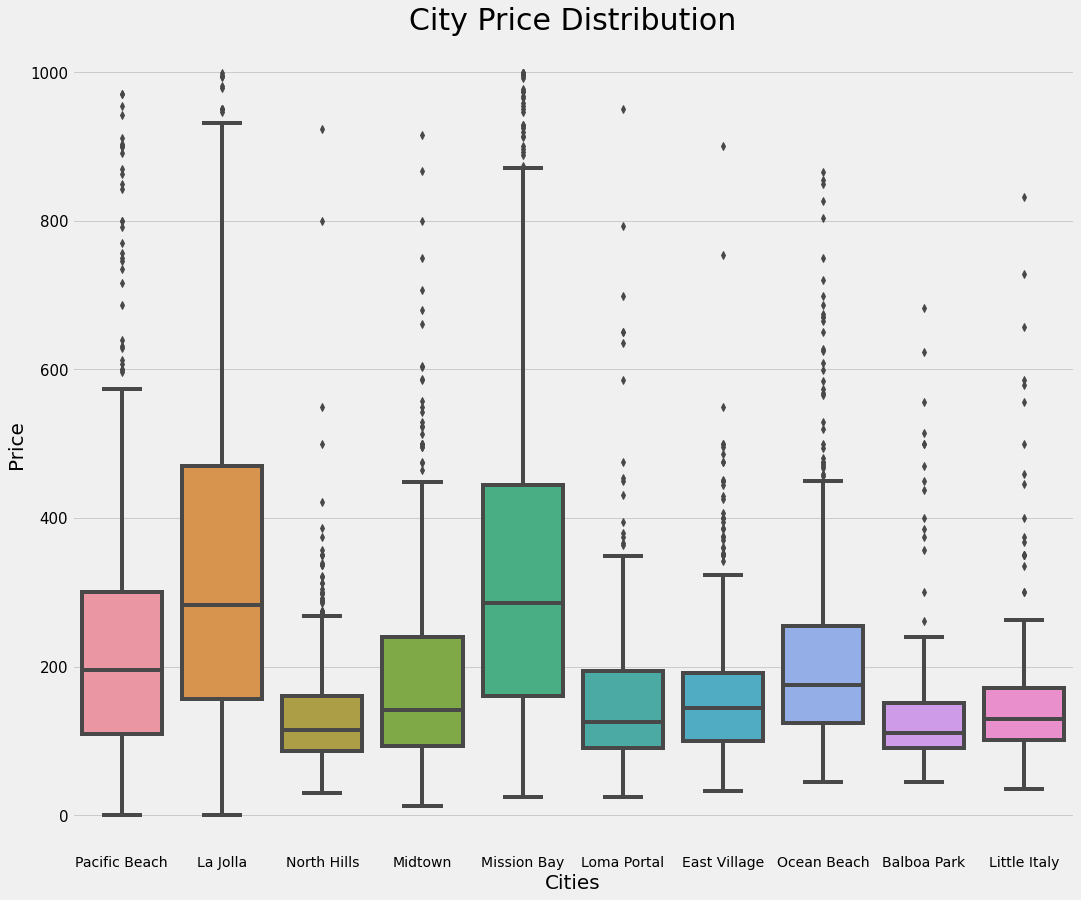

In [20]:
#Plot Price Distribution on top 10 region area
#Only use the data whose price is less than $1000
price_data = data[data.price < 1000]
labels = data.neighbourhood.value_counts().index[0:10]
ten_top_neighbourhood = price_data.loc[data['neighbourhood'].isin(labels)]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,14))
sns.boxplot(y='price',x='neighbourhood',data = ten_top_neighbourhood)
plt.xlabel('Cities', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.title('City Price Distribution', fontsize = 30)
plt.show()


In [22]:
#Plot room type proportion on all region area

#set color
colors = ['#16478E', '#0083BF', '#32C3EB', '#97D9EA']
room_types=data.groupby(['neighbourhood', 'room_type']).size()
# use below line to show rooms types in all cities
# for region in data.neighbourhood.unique():
plot_num = 0
for region in ['Mission Bay', 'La Jolla', 'Pacific Beach']:
    neighbourhood_types = room_types[region]
    labels = neighbourhood_types.index
    sizes = neighbourhood_types.values
    
    neighbourhood_fig = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    neighbourhood_fig.update_traces(title = region, marker=dict(colors=colors))
    neighbourhood_fig.update_layout(legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=1.1
    )   )
    neighbourhood_fig.show()
    plot_num += 1